# Projet 3 : Concevez une application au service de la santé publique

Nettoyage de données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Analyse
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## 1. Ouverture du fichier

In [2]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',encoding='utf-8', low_memory=False)

In [3]:
data_df = pd.DataFrame(data)

## 2. Visualisation du DataFrame

In [4]:
data_df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Description du DataFrame

### 1. Information du DataFrame

In [5]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
None


### 2. Taille du DataFrame

In [6]:
data_df.shape

(320772, 162)

### 3. Noms des colonnes

In [7]:
data_df.columns.values.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

### 4. Statistiques du DataFrame

In [8]:
data_df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


### 5. Type de données

In [9]:
data_df.dtypes#.values.tolist()

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

## 4. Calcul du taux de remplissage

In [10]:
def tauxRemplissage(df):
    """
    Entrée : DataFrame
    Objectifs : Calcul du taux de remplissage, 1 beaucoup de données, 0 beaucoup de valeurs manquantes
    Sorties : DataFrame
    """
        
    val = 1 - df.isna().sum()/len(df)
    val = pd.DataFrame(val)
    val = val.transpose()
    return val

In [13]:
def graphRemplissage(df) :
    """
    Entrée : Dataframe
    Objectifs : Récupérer la DataFrame du taux de remplissage et afficher le graphique du taux de remplissage
    Sortie : Graphe
    """

    df = tauxRemplissage (df)
    fig,ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (40,10)
    plt.rcParams.update({'font.size': 10})
    ax.tick_params(axis='x', rotation=90)
    sns.barplot( data=df, color = 'blue')
    plt.xlabel('\nColonnes', fontsize=10)
    plt.ylabel('Taux de valeurs\n', fontsize=10)
    plt.gca().xaxis.set_tick_params(labelsize = 10)
    plt.gca().yaxis.set_tick_params(labelsize = 10)
    plt.title("Taux de remplissage", fontsize=10,fontweight = 'bold')

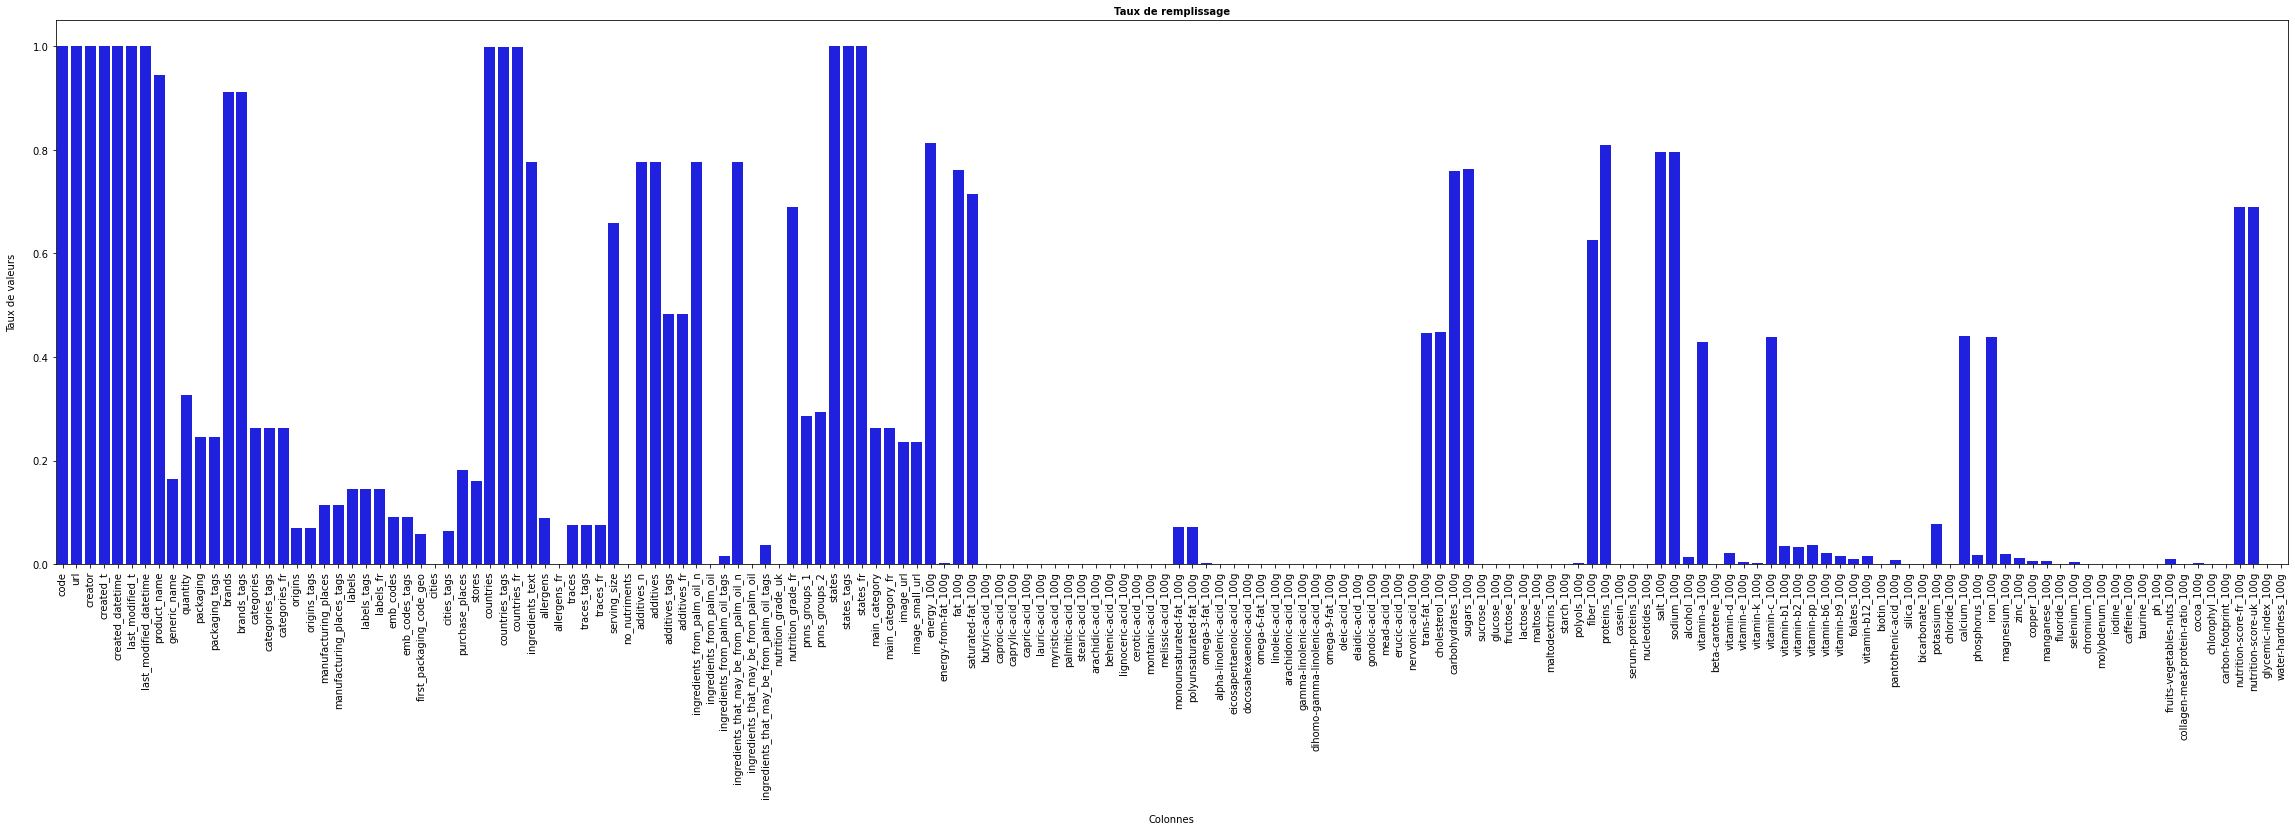

In [14]:
#Affichage du taux de remplissage
graphRemplissage(data_df)

## 5. Définir un seuil

In [15]:
def seuil(df):
    """
    Entrée : DataFrame
    Objectifs : Définir un seuil et récupérer les données
    Sortie : DataFrame avec les colonnes sélectionnées
    """
    val_nan = tauxRemplissage(df)
    seuil = [ x for x in val_nan.columns if val_nan.loc[0,x]>.5 ]
    return df[seuil]

In [16]:
data_selec = seuil(data_df)
data_selec.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


In [17]:
data_selec.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                   object
created_datetime                            object
last_modified_t                             object
last_modified_datetime                      object
product_name                                object
brands                                      object
brands_tags                                 object
countries                                   object
countries_tags                              object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr             

## 6. Sélection des indicateurs

### 1. Analyse des indicateurs

In [18]:
data_selec.select_dtypes(exclude = 'object').columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [19]:
data_selec.select_dtypes(include = 'object').columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr'],
      dtype='object')

### 2. Supprimer les valeurs duppliquées

In [20]:
data_selec.sort_values('created_t').drop_duplicates("product_name", keep = "last", inplace = True)

### 3. Choix des indicateurs

In [21]:
indicateur = (['code','created_datetime','last_modified_datetime',
'product_name','countries','nutrition_grade_fr',
'additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',
'energy_100g','fat_100g','saturated-fat_100g',
'carbohydrates_100g','sugars_100g','fiber_100g',
'proteins_100g','salt_100g','sodium_100g',
'nutrition-score-fr_100g','nutrition-score-uk_100g'])

In [22]:
df = data_selec[indicateur]
df.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),US,d,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,US,b,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,US,d,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,US,NaN,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


## 7. Conversion date

In [23]:
def conversionDate(data,indicateur_date):
    """
    Entrée : Dataframe et une liste de date à convertir
    Objectif : Convertir la liste en datetime
    Sortie : DataFrame en bonne conversion
    """
    
    for i in range(0,len(indicateur_date),1):
        data[indicateur_date[i]] = pd.to_datetime(data[indicateur_date[i]], format="%Y-%m-%dT%H:%M:%S.%f", errors = 'coerce')
    return df

In [24]:
indicateur_date = ([
'created_datetime',
'last_modified_datetime'])

In [25]:
conversionDate(df,indicateur_date).head()

C:\Users\cisso\AppData\Local\Temp/ipykernel_21696/3974037538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicateur_date[i]] = pd.to_datetime(data[indicateur_date[i]], format="%Y-%m-%dT%H:%M:%S.%f", errors = 'coerce')


,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),US,d,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Peanuts,US,b,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,US,d,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,NaN,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


In [26]:
df.dtypes

code                                                    object
created_datetime                           datetime64[ns, UTC]
last_modified_datetime                     datetime64[ns, UTC]
product_name                                            object
countries                                               object
nutrition_grade_fr                                      object
additives_n                                            float64
ingredients_from_palm_oil_n                            float64
ingredients_that_may_be_from_palm_oil_n                float64
energy_100g                                            float64
fat_100g                                               float64
saturated-fat_100g                                     float64
carbohydrates_100g                                     float64
sugars_100g                                            float64
fiber_100g                                             float64
proteins_100g                                          

## 4. Conversion

In [27]:
def conversion (df):
    """
    Entrée : DataFrame
    Objectif : Selectionner les colonnes de types objets et les convertir en string
    Sortie ; DataFrame convertit
    """
    col = df.select_dtypes(include = 'object').columns
    df[col] = df[col].astype('string')
    return df

In [28]:
df = conversion(df)

C:\Users\cisso\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
df.dtypes

code                                                    string
created_datetime                           datetime64[ns, UTC]
last_modified_datetime                     datetime64[ns, UTC]
product_name                                            string
countries                                               string
nutrition_grade_fr                                      string
additives_n                                            float64
ingredients_from_palm_oil_n                            float64
ingredients_that_may_be_from_palm_oil_n                float64
energy_100g                                            float64
fat_100g                                               float64
saturated-fat_100g                                     float64
carbohydrates_100g                                     float64
sugars_100g                                            float64
fiber_100g                                             float64
proteins_100g                                          

## 5. Gérer les valeurs abérantes et atypiques

In [30]:
df.rename(columns={'energy_100g': 'energy','ingredients_from_palm_oil_n': 'palm_oil', 'ingredients_that_may_be_from_palm_oil_n':'maybe_palm_oil', 'nutrition-score-fr_100g':'nutrition-score-fr', 'nutrition-score-uk_100g':'nutrition-score-uk'}, inplace=True)
df.head()

C:\Users\cisso\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr,nutrition-score-uk
0,0000000003087,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,en:FR,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),US,d,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Peanuts,US,b,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,US,d,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,<NA>,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


On met les valeurs supérieur à 100g et inférieur à 0 les ingrédients en valeur manquante.<br>
Pour l'énergie, les valeurs doivent être comprise entre 0 et 3700

In [31]:
def mask100(df):
    """
    Entrée : DataFrame
    Objectifs : On prend les colonnes qui terminent pas 100g et on transforme en NaN si la valeur est supérieur à 100
    Sortie : DataFrame
    """
    col = df[df.columns[pd.Series(df.columns).str.endswith('_100g')]]
    df[col.columns] = df[col.columns].mask(col>100)
    return df

In [32]:
def maskneg(df):
    """
    Entrée : DataFrame
    Objectifs : On prend les colonnes qui terminent pas 100g et on transforme en NaN si la valeur est inférieur à 0
    Sortie : DataFrame
    """
    col = df[df.columns[pd.Series(df.columns).str.endswith('_100g')]]
    df[col.columns] = df[col.columns].mask(col<0)
    return df

In [33]:
def maskener(data, col):
    """
    Entrée : DataFrame et une colonne energy
    Objectifs : Énergie, le maximum est 3700
    Sortie : DataFrame
    """
    data[col] = data[col].mask(data[col]>3700)
    return df

In [34]:
df = mask100(df)

C:\Users\cisso\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
df = maskneg(df)

In [36]:
df = maskener(df,'energy')

C:\Users\cisso\AppData\Local\Temp/ipykernel_21696/1775418262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].mask(data[col]>3700)


La quantité de graisse saturée doit être inférieur au gras. De même que le sucre par rapport au glucide et le sodium par rapport au sel 

In [37]:
def verif(data, col1, col2):
    """
    Entrée : Dataframe, colonne à changer 1 et 2
    Objectifs : Mettre à NaN la colonne 2 supérieur à la colonne 1
    Sortie : Dataframe
    """
    
    data[col2] = data[col2].mask(data[col1] < data[col2])
    return data

In [38]:
verif(df, 'fat_100g', 'saturated-fat_100g')
verif(df, 'carbohydrates_100g', 'sugars_100g')
verif(df, 'salt_100g', 'sodium_100g')

C:\Users\cisso\AppData\Local\Temp/ipykernel_21696/356029479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col2] = data[col2].mask(data[col1] < data[col2])


,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr,nutrition-score-uk
0,0000000003087,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,en:FR,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),US,d,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Peanuts,US,b,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,US,d,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,<NA>,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,2017-03-27 16:14:59+00:00,2017-04-03 18:34:58+00:00,Tomato & ricotta,en:RO,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,2017-03-09 11:31:16+00:00,2017-04-03 18:34:59+00:00,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",US,b,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,2015-01-24 11:36:17+00:00,2017-04-03 18:34:59+00:00,乐吧泡菜味薯片,China,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,2017-04-16 10:54:49+00:00,2017-04-16 10:54:49+00:00,Tomates aux Vermicelles,en:FR,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


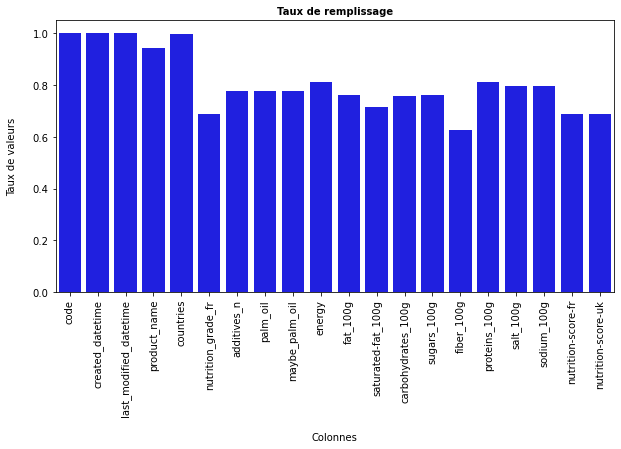

In [39]:
plt.rcParams["figure.figsize"] = (10,5)
graphRemplissage(df)

In [40]:
df.rename(columns={'saturated-fat_100g': 'saturated-fat', 'sugars_100g': 'sugars', 'sodium_100g':'sodium'}, inplace=True)
df.head()

C:\Users\cisso\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr,nutrition-score-uk
0,0000000003087,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,en:FR,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),US,d,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Peanuts,US,b,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,US,d,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,<NA>,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


## 6. Gérer les valeurs manquantes

### 1. Écarter les sommes égal à zéro

In [41]:
def somme(df):
    """
    Entrée : DataFrame
    Objectifs : Calcul des lignes
    Sortie : Somme des lignes
    """
    col = df[df.columns[pd.Series(df.columns).str.endswith('_100g')]]
    return col.sum(axis = 1)

In [42]:
def sommeNul(df):
    """
    Entrée : DataFrame
    Objectifs : Calculer la somme des lignes et écarter si elles sont nulles
    Sortie : Somme sur les lignes
    """
    
    somme = df.loc[:,'additives_n':'nutrition-score-fr'].sum(axis = 1)
    return somme

In [43]:
val = sommeNul(df) != 0
number = np.where(val)
df1 = df.iloc[number].copy()

### 2. Valeurs supérieur à 100

In [44]:
cal = somme(df1)<=100
number = np.where(cal)
df2 = df1.iloc[number].copy()
df2.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr,nutrition-score-uk
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,<NA>,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
6,0000000016117,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Long Grain White Rice,US,<NA>,0.0,0.0,0.0,1490.0,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,NaN
9,0000000016513,2017-03-09 10:34:14+00:00,2017-03-09 10:34:14+00:00,Organic Sunflower Oil,US,<NA>,0.0,0.0,0.0,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0000000016612,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Adzuki Beans,US,<NA>,0.0,0.0,0.0,1393.0,1.04,NaN,62.50,NaN,12.5,22.92,NaN,NaN,NaN,NaN
11,0000000016650,2017-03-09 10:34:28+00:00,2017-03-09 10:34:28+00:00,Organic Penne Pasta,US,<NA>,0.0,0.0,0.0,1540.0,1.75,NaN,73.68,NaN,1.8,14.04,NaN,NaN,NaN,NaN


### 3.Sélection des lignes le plus remplis

In [45]:
df3 = df2.transpose().copy()
val_nan = tauxRemplissage(df3)
val_nan = val_nan.reset_index()
sel_cols=[ x for x in val_nan.columns if val_nan.loc[0,x]>.5 ]
df3 = df2.loc[sel_cols]
df3.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr,nutrition-score-uk
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,<NA>,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
6,0000000016117,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Long Grain White Rice,US,<NA>,0.0,0.0,0.0,1490.0,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,NaN
9,0000000016513,2017-03-09 10:34:14+00:00,2017-03-09 10:34:14+00:00,Organic Sunflower Oil,US,<NA>,0.0,0.0,0.0,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0000000016612,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Adzuki Beans,US,<NA>,0.0,0.0,0.0,1393.0,1.04,NaN,62.50,NaN,12.5,22.92,NaN,NaN,NaN,NaN
11,0000000016650,2017-03-09 10:34:28+00:00,2017-03-09 10:34:28+00:00,Organic Penne Pasta,US,<NA>,0.0,0.0,0.0,1540.0,1.75,NaN,73.68,NaN,1.8,14.04,NaN,NaN,NaN,NaN


## 7. Analyse des valeurs

In [46]:
colonne = ['additives_n', 'palm_oil',
'maybe_palm_oil', 'fat_100g', 'saturated-fat',
'carbohydrates_100g', 'sugars', 'fiber_100g', 'proteins_100g',
'salt_100g', 'sodium']

Text(0.5, 1.0, 'Graphique sur les quantités')

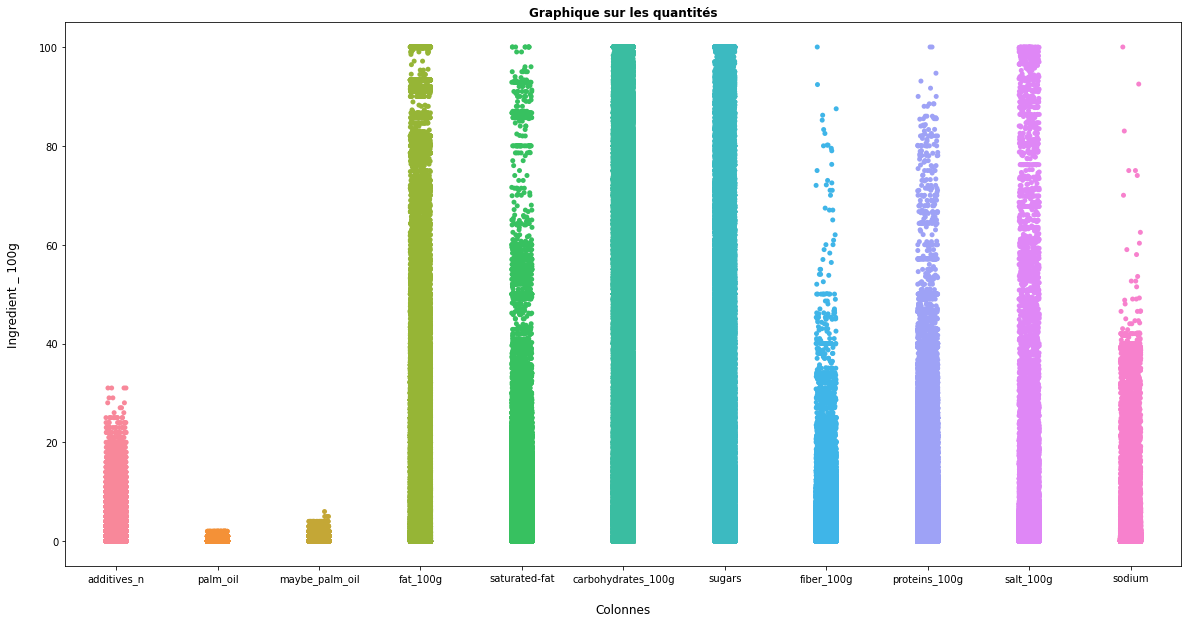

In [47]:
plt.rcParams["figure.figsize"] = (20,10)
sns.stripplot(data = df3[colonne])
plt.xlabel('\nColonnes', fontsize=12)
plt.ylabel('Ingredient _ 100g\n', fontsize=12)
plt.title("Graphique sur les quantités", fontsize=12,fontweight = 'bold')

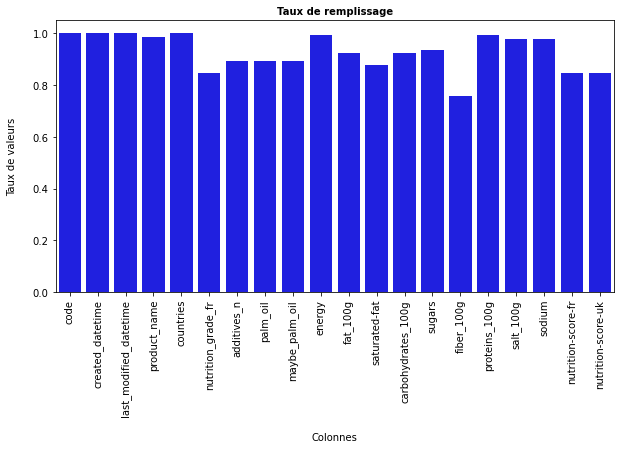

In [48]:
plt.rcParams["figure.figsize"] = (10,5)
graphRemplissage(df3)

In [49]:
def densite(col1,col2):
    """
    Entrée : nom de colonne
    Objectifs : Afficher les densités des deux variables
    Sorties : Plot
    """
    
    plt.rcParams["figure.figsize"] = (15,5)
    df3[col1].plot.kde(color='red')
    df3[col2].plot.kde(color='blue')
    plt.xlim([-25, 100])
    plt.ylim([0, 0.3])
    plt.title('Densité')
    plt.show()

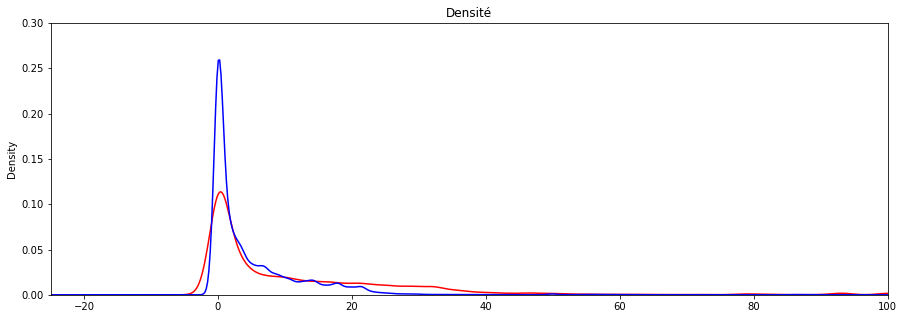

In [50]:
densite('fat_100g','saturated-fat')

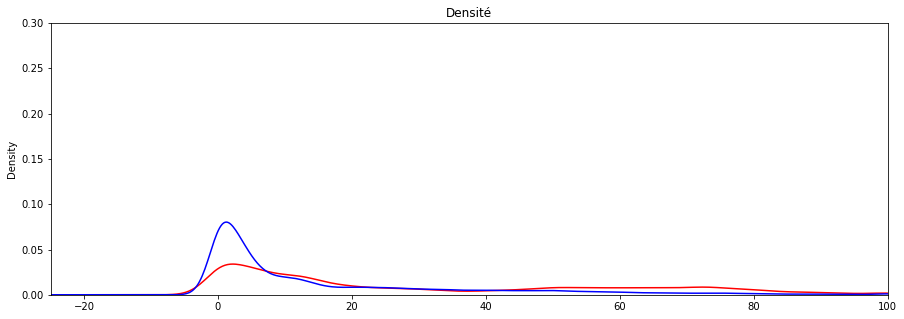

In [51]:
densite('carbohydrates_100g','sugars')

On affiche les valeurs 0 et 100 des différentes colonnes

## 8. Corrélation

In [52]:
df_norm = df3.select_dtypes(include = 'float64')

In [53]:
corr = df_norm.corr()

C:\Users\cisso\AppData\Local\Temp/ipykernel_21696/2795299928.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


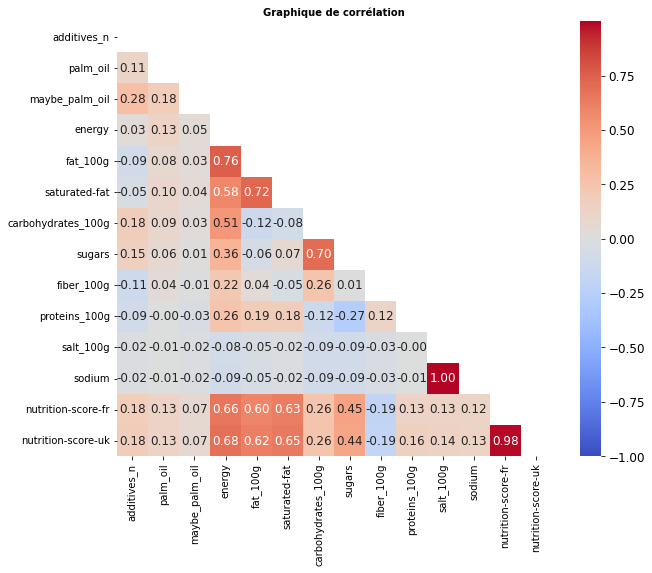

In [54]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, annot=True, square=True, mask = mask, vmin = -1, fmt=".2f", cmap = 'coolwarm')
plt.title("Graphique de corrélation", fontsize=10,fontweight = 'bold')
plt.show()

Colonnes corréllée : <br>
fat_100g, saturated-fat, energy, sugars

Vérifions que les colonnes ne sont pas de distributions gaussiennes

Text(0.5, 1.0, 'Histogramme _ fat_100g')

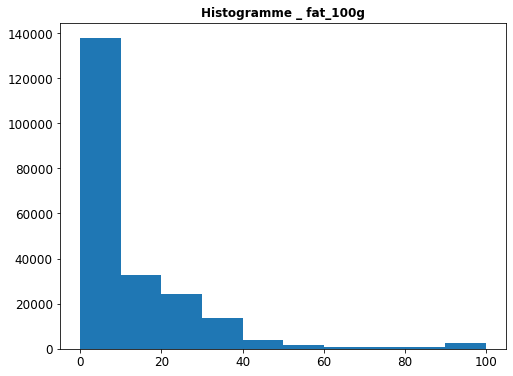

In [55]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df3["fat_100g"])
plt.title("Histogramme _ fat_100g", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ saturated-fat')

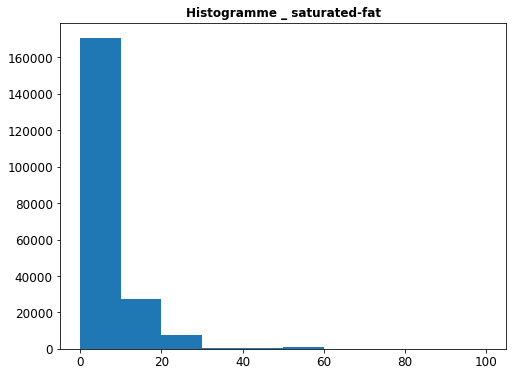

In [56]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df3["saturated-fat"])
plt.title("Histogramme _ saturated-fat", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ energy')

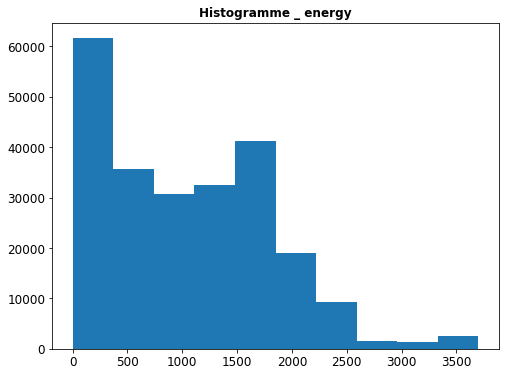

In [57]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df3["energy"])
plt.title("Histogramme _ energy", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ sugars')

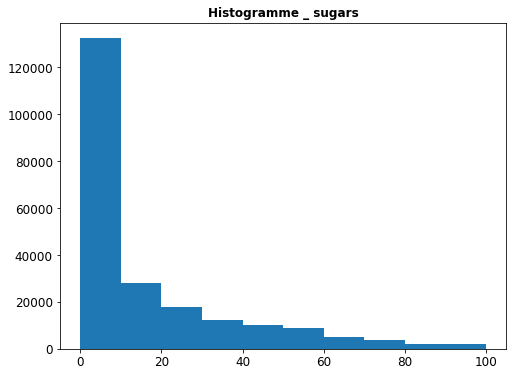

In [58]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df3["sugars"])
plt.title("Histogramme _ sugars", fontsize=12,fontweight = 'bold')

Les quatres colonnes sont corréllées, mais elles ne suivent pas une distribution gaussienne.

## 9. Combler les valeurs manquantes

### 1. Méthode SimpleImputer

In [59]:
col = ['fiber_100g','nutrition-score-uk']
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
df3[col] = imp.fit_transform(df3[col])

In [60]:
df3.drop(columns = 'nutrition-score-uk', inplace = True)

### 2. Méthode IterativeImputer

In [61]:
cor = ['energy','fat_100g', 'saturated-fat', 'sugars','nutrition-score-fr']
data_imputed = df3[cor]

In [62]:
imp = IterativeImputer(random_state=0, max_iter=100)
df3.loc[:,cor] = imp.fit_transform(data_imputed[cor])

In [63]:
df3[cor].head()

,energy,fat_100g,saturated-fat,sugars,nutrition-score-fr
4,1552.0,1.430000,1.636841,39.282530,11.139847
6,1490.0,18.923314,6.966711,18.482962,12.270520
9,3586.0,100.000000,7.140000,-35.164359,19.088471
10,1393.0,1.040000,1.438453,35.496594,10.064075
11,1540.0,1.750000,1.728930,38.614034,11.089328


Text(0.5, 1.0, "Graphique sur la quantité d'énergie")

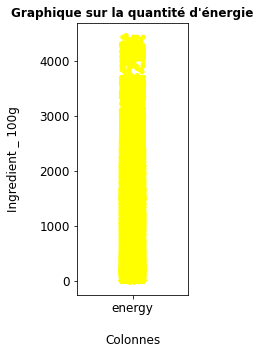

In [64]:
cor = ['energy']
plt.rcParams["figure.figsize"] = (2,5)
sns.stripplot(data = df3[cor], color = 'yellow')
plt.xlabel('\nColonnes', fontsize=12)
plt.ylabel('Ingredient _ 100g\n', fontsize=12)
plt.title("Graphique sur la quantité d'énergie", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Graphique sur les quantités')

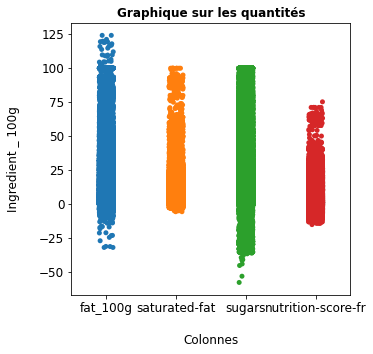

In [65]:
cor = ['fat_100g', 'saturated-fat', 'sugars','nutrition-score-fr']
plt.rcParams["figure.figsize"] = (5,5)
sns.stripplot(data = df3[cor])
plt.xlabel('\nColonnes', fontsize=12)
plt.ylabel('Ingredient _ 100g\n', fontsize=12)
plt.title("Graphique sur les quantités", fontsize=12,fontweight = 'bold')

### 3. Méthodes KNN Imputer

In [66]:
col = ['fat_100g', 'saturated-fat', 'sugars',
'additives_n','palm_oil',
'carbohydrates_100g','maybe_palm_oil',
'fiber_100g','proteins_100g',
'salt_100g','sodium',
'nutrition-score-fr']

In [67]:
KnnImpute = KNNImputer(n_neighbors=3)
df3.loc[:,col] = KnnImpute.fit_transform(df3[col])
df3.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,<NA>,0.0,0.0,0.0,1552.0,1.430000,1.636841,77.14,39.282530,5.7,8.57,0.000000,0.000000,11.139847
6,0000000016117,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Long Grain White Rice,US,<NA>,0.0,0.0,0.0,1490.0,18.923314,6.966711,80.00,18.482962,0.0,8.89,0.203333,0.080052,12.270520
9,0000000016513,2017-03-09 10:34:14+00:00,2017-03-09 10:34:14+00:00,Organic Sunflower Oil,US,<NA>,0.0,0.0,0.0,3586.0,100.000000,7.140000,0.00,-35.164359,0.0,0.00,0.000000,0.000000,19.088471
10,0000000016612,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Adzuki Beans,US,<NA>,0.0,0.0,0.0,1393.0,1.040000,1.438453,62.50,35.496594,12.5,22.92,0.010160,0.004000,10.064075
11,0000000016650,2017-03-09 10:34:28+00:00,2017-03-09 10:34:28+00:00,Organic Penne Pasta,US,<NA>,0.0,0.0,0.0,1540.0,1.750000,1.728930,73.68,38.614034,1.8,14.04,0.049107,0.019333,11.089328


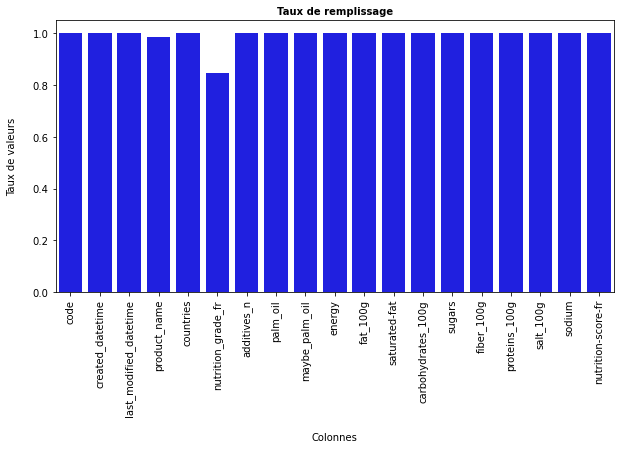

In [68]:
plt.rcParams["figure.figsize"] = (10,5)
graphRemplissage(df3)

In [69]:
col = ['additives_n','palm_oil','fat_100g',
'saturated-fat','carbohydrates_100g',
'sugars','maybe_palm_oil',
'fiber_100g','proteins_100g',
'salt_100g','sodium',
'nutrition-score-fr']

C:\Users\cisso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


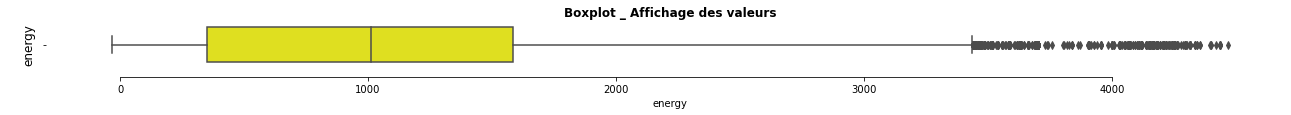

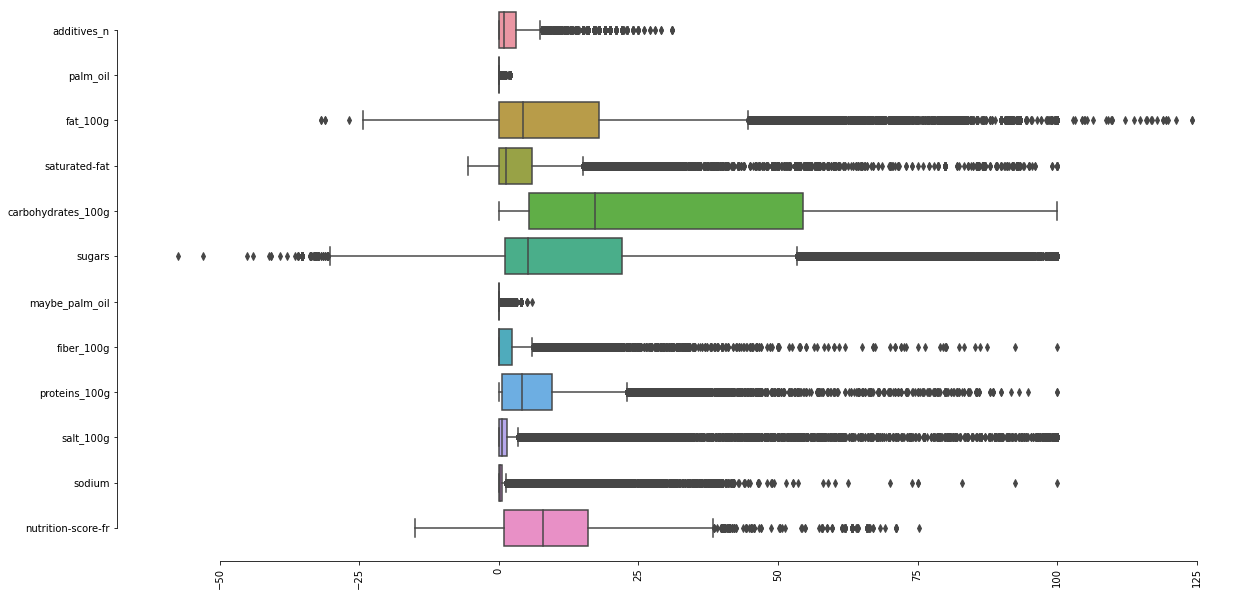

In [70]:
fig,ax = plt.subplots(figsize=(22,1.8))
plt.subplot(2,1,1)
sns.boxplot(df3['energy'], color = 'yellow')
plt.ylabel('\nenergy', fontsize=12)
sns.despine(offset=10, trim=True)
plt.title("Boxplot _ Affichage des valeurs", fontsize=12,fontweight = 'bold')
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df3.loc[:,col], orient = 'h')
sns.despine(offset=10, trim=True)
ax.tick_params(axis='x', rotation=90)

### 4. Méthode KnnClassifier

In [71]:
df_knn_nan = df3[df3["nutrition_grade_fr"].isnull()]
df_knn = df3[~df3["nutrition_grade_fr"].isnull()].copy()
df_knn_nan.shape, df_knn.shape

((36532, 19), (200077, 19))

In [72]:
colonne = ['additives_n','palm_oil',
'maybe_palm_oil','energy',
'fat_100g','saturated-fat',
'carbohydrates_100g','sugars',
'fiber_100g','proteins_100g',
'salt_100g','sodium']

In [73]:
xnan = df_knn_nan[colonne].values

laben = preprocessing.LabelEncoder()
y = laben.fit_transform(df_knn["nutrition_grade_fr"])
x = df_knn[colonne].values
np.unique(y)

array([0, 1, 2, 3, 4])

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [75]:
scorer = make_scorer(f1_score, greater_isçbetter = True, average = 'micro')
scorer = make_scorer(accuracy_score)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred = knn.predict(x_train)
ynan = knn.predict(xnan)
np.unique(ynan)

array([0, 1, 2, 3, 4])

In [77]:
df_knn_nan.loc[:,"nutrition_grade_fr"] = laben.inverse_transform(ynan)

C:\Users\cisso\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [78]:
df3.loc[:,"nutrition_grade_fr"] = pd.concat([df_knn_nan,df_knn])

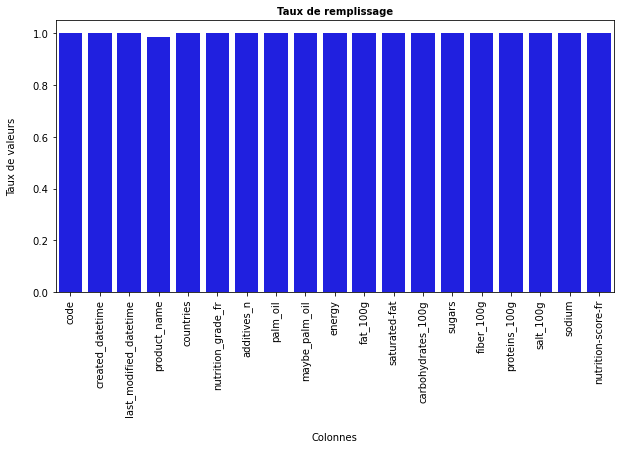

In [79]:
plt.rcParams["figure.figsize"] = (10,5)
graphRemplissage(df3)

## 10. Vérifiation

In [80]:
cal = somme(df3)<=100
number = np.where(cal)
df3 = df3.iloc[number]
df3.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr
4,0000000016094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Organic Polenta,US,d,0.0,0.0,0.0,1552.0,1.43,1.636841,77.14,39.282530,5.7,8.57,0.000000,0.000000,11.139847
9,0000000016513,2017-03-09 10:34:14+00:00,2017-03-09 10:34:14+00:00,Organic Sunflower Oil,US,d,0.0,0.0,0.0,3586.0,100.00,7.140000,0.00,-35.164359,0.0,0.00,0.000000,0.000000,19.088471
10,0000000016612,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Organic Adzuki Beans,US,c,0.0,0.0,0.0,1393.0,1.04,1.438453,62.50,35.496594,12.5,22.92,0.010160,0.004000,10.064075
11,0000000016650,2017-03-09 10:34:28+00:00,2017-03-09 10:34:28+00:00,Organic Penne Pasta,US,d,0.0,0.0,0.0,1540.0,1.75,1.728930,73.68,38.614034,1.8,14.04,0.049107,0.019333,11.089328
12,0000000016872,2017-03-09 10:34:10+00:00,2017-03-09 10:34:11+00:00,Zen Party Mix,US,d,1.0,0.0,0.0,2230.0,36.67,5.000000,36.67,3.330000,6.7,16.67,1.607820,0.633000,12.000000


In [81]:
df3.shape

(235805, 19)

In [82]:
df3 = df3[df3['fat_100g'] <= 100]
df3 = df3[df3['fat_100g'] >= 0]

In [83]:
df3 = df3[df3['saturated-fat'] <= 100]
df3 = df3[df3['saturated-fat'] >= 0]

In [84]:
df3 = df3[df3['carbohydrates_100g'] <= 100]
df3 = df3[df3['carbohydrates_100g'] >= 0]

In [85]:
df3 = df3[df3['sugars'] <= 100]
df3 = df3[df3['sugars'] >= 0]

In [86]:
df3 = df3[df3['nutrition-score-fr'] <= 40]
df3 = df3[df3['nutrition-score-fr'] >= -15]

In [87]:
df3 = df3[df3['energy']<=3700]

In [88]:
df3 = df3[df3['fat_100g'] >= df3['saturated-fat']]
df3 = df3[df3['carbohydrates_100g'] >= df3['sugars']]
df3 = df3[df3['salt_100g'] >= df3['sodium']]

C:\Users\cisso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


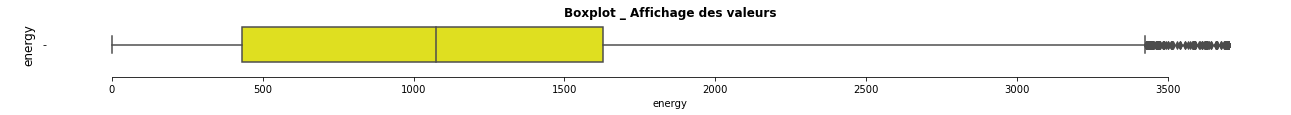

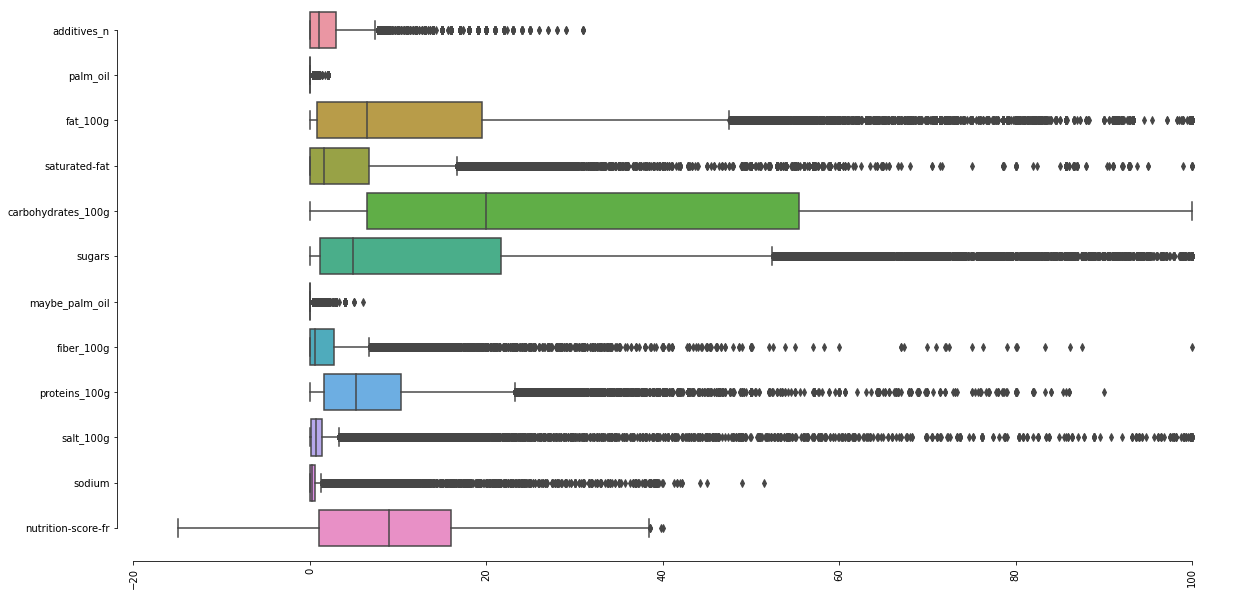

In [89]:
fig,ax = plt.subplots(figsize=(22,1.8))
plt.subplot(2,1,1)
sns.boxplot(df3['energy'], color = 'yellow')
plt.ylabel('\nenergy', fontsize=12)
sns.despine(offset=10, trim=True)
plt.title("Boxplot _ Affichage des valeurs", fontsize=12,fontweight = 'bold')
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df3.loc[:,col],orient = "h")
sns.despine(offset=10, trim=True)
ax.tick_params(axis='x', rotation=90)

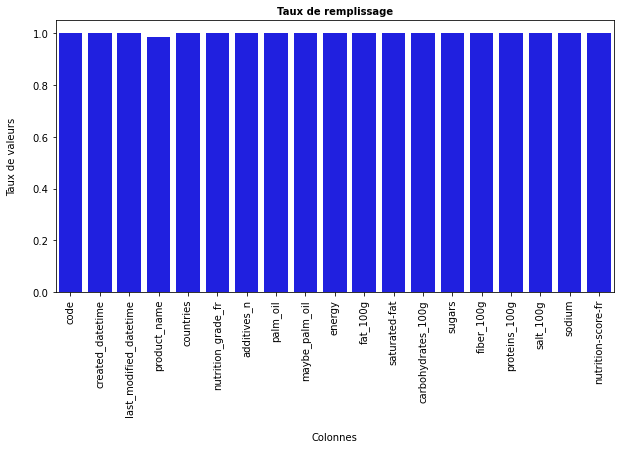

In [90]:
plt.rcParams["figure.figsize"] = (10,5)
graphRemplissage(df3)

In [91]:
df3.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr
11,0000000016650,2017-03-09 10:34:28+00:00,2017-03-09 10:34:28+00:00,Organic Penne Pasta,US,d,0.0,0.0,0.0,1540.0,1.75,1.72893,73.68,38.614034,1.8,14.04,0.049107,0.019333,11.089328
12,0000000016872,2017-03-09 10:34:10+00:00,2017-03-09 10:34:11+00:00,Zen Party Mix,US,d,1.0,0.0,0.0,2230.0,36.67,5.00000,36.67,3.330000,6.7,16.67,1.607820,0.633000,12.000000
17,0000000018173,2017-03-09 10:34:27+00:00,2017-03-09 10:34:27+00:00,Organic Sweetened Banana Chips,US,d,0.0,0.0,0.0,2092.0,26.67,23.33000,66.67,16.670000,3.3,3.33,0.000000,0.000000,20.608340
19,0000000018227,2017-03-09 10:34:42+00:00,2017-03-09 10:34:42+00:00,Organic Oat Groats,US,a,0.0,0.0,0.0,1096.0,5.95,1.19000,66.67,2.380000,9.5,16.67,0.025400,0.010000,-6.000000
20,0000000018265,2017-03-09 10:35:06+00:00,2017-03-09 10:35:06+00:00,Energy Power Mix,US,d,0.0,0.0,0.0,1464.0,17.50,7.50000,42.50,32.500000,5.0,7.50,0.284480,0.112000,14.000000


In [92]:
df3 = conversion(df3)
df3.dtypes

code                                   string
created_datetime          datetime64[ns, UTC]
last_modified_datetime    datetime64[ns, UTC]
product_name                           string
countries                              string
nutrition_grade_fr                     string
additives_n                           float64
palm_oil                              float64
maybe_palm_oil                        float64
energy                                float64
fat_100g                              float64
saturated-fat                         float64
carbohydrates_100g                    float64
sugars                                float64
fiber_100g                            float64
proteins_100g                         float64
salt_100g                             float64
sodium                                float64
nutrition-score-fr                    float64
dtype: object

## 11. Enregistrement de fichier csv

In [93]:
df3.to_csv('notebookexploration.csv', index=False, date_format ="%Y-%m-%dT%H:%M:%S.%f")